<a href="https://colab.research.google.com/github/vuongngo1234/report-homework2/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

#mount drive vao code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#thêm data và xử lý data
folder = '/content/drive/MyDrive/hoa/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoahong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoamai'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoasung'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoadao'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('hoasen'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('hoa_photos.npy', photos)
save('hoa_labels.npy', labels)

(24, 200, 200, 3) (24,)


In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train
history = model.fit(photos, labels, validation_split=0.1, epochs=30, verbose=1)
model.evaluate(photos,labels)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 226.6298 - accuracy: 0.0000e+00 - val_loss: 4864.1714 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 6245.0806 - accuracy: 0.0000e+00 - val_loss: 3808.8977 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 463.9497 - accuracy: 0.8571 - val_loss: 4416.8286 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 1806.8877 - accuracy: 0.0476 - val_loss: 3213.2695 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 443.2407 - accuracy: 0.8571 - val_loss: 2718.7371 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 406.7699 - accuracy: 0.8571 - val_loss: 2157.2283 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 318.4121 - accuracy: 0.8571 - val_loss: 1612.

[21.763639450073242, 0.875]

In [ ]:
#lưu model
model.save('hoa.h5')
history = model.fit(photos, labels, epochs=10,batch_size=34, verbose=1)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 21.7636 - accuracy: 0.8750
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 13.2566 - accuracy: 0.8750
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 4.0204 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.2319 - accuracy: 0.9583
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 1.5295 - accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 4.0331e-06 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.0434 - accuracy: 0.9583
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 2.4539 - accuracy: 0.9167
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.5882 - accuracy: 0.9167


In [ ]:
model.evaluate(photos,labels)

1/1 [==============================] - 1s 693ms/step - loss: 1.4901e-08 - accuracy: 1.0000


[1.4901158529312397e-08, 1.0]

In [ ]:
model.save('hoa.h5')

In [ ]:
classes = ["hoahong","hoasen","hoadao","hoamai","hoasung "]

1/1 [==============================] - 0s 55ms/step
[[0.1824095  0.08340104 0.09459747 0.11524454 0.0932615  0.04743253
  0.1027319  0.11951653 0.0492335  0.11217147]]


'hoahong'

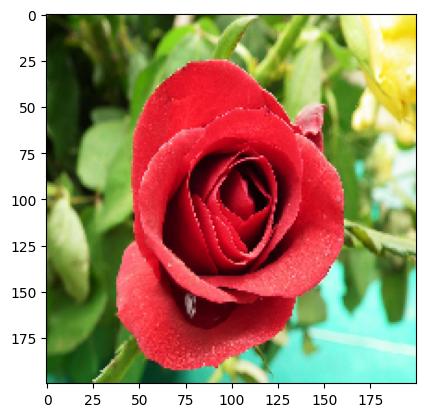

In [ ]:
#thử predict bằng model
img = load_img('/content/drive/MyDrive/hoa/hoahong.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]